In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ncpi-2020/NCPI_dataset_2020_report.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"../input/ncpi-2020/NCPI_dataset_2020_report.csv")
df.head()

,Unnamed: 0,country,laws,web_alexa,news_alexa,removal_google,freedom_net,infocomm_imp,patent_application,patent_app_capita,...,score_intent,capint_overall,capint_surveillance,capint_defense,capint_control,capint_intelligence,capint_commercial,capint_offense,capint_norms,score_capint
0,1,Australia,2,0,0,101,72,0.827,2757,112.758147,...,0.566,20.557,23.456,48.820,11.548,14.918,10.388,7.036,24.119,20.041
1,2,Brazil,2,0,0,993,64,1.289,4980,23.794930,...,0.259,7.103,3.121,37.500,3.812,0.954,1.906,0.000,9.905,8.171
2,3,Canada,2,1,0,224,87,1.254,4349,118.746625,...,0.547,21.984,24.671,61.516,10.007,15.815,6.802,8.949,22.739,21.500
3,4,China,4,0,21,340,10,7.077,1393815,988.859694,...,0.803,44.863,48.055,68.255,40.701,35.263,31.915,30.583,35.525,41.471
4,5,Egypt,2,0,0,0,26,1.000,997,10.220069,...,0.163,2.456,3.467,20.595,0.333,0.000,0.172,0.000,5.357,4.275


In [3]:
df1 = df
df1 = df1.loc[:, ~df.columns.str.contains('^Unnamed')]

df1["attacks_total"] = df["attack_objective"] + df["attack_surveillance"] + df["attack_control"] + df["attack_intelligence"] 
+ df["attack_commercial"] + df["attack_offense"]
df1.head()

,country,laws,web_alexa,news_alexa,removal_google,freedom_net,infocomm_imp,patent_application,patent_app_capita,broadband_speed,...,capint_overall,capint_surveillance,capint_defense,capint_control,capint_intelligence,capint_commercial,capint_offense,capint_norms,score_capint,attacks_total
0,Australia,2,0,0,101,72,0.827,2757,112.758147,2.200,...,20.557,23.456,48.820,11.548,14.918,10.388,7.036,24.119,20.041,2
1,Brazil,2,0,0,993,64,1.289,4980,23.794930,2.703,...,7.103,3.121,37.500,3.812,0.954,1.906,0.000,9.905,8.171,0
2,Canada,2,1,0,224,87,1.254,4349,118.746625,6.133,...,21.984,24.671,61.516,10.007,15.815,6.802,8.949,22.739,21.500,2
3,China,4,0,21,340,10,7.077,1393815,988.859694,5.676,...,44.863,48.055,68.255,40.701,35.263,31.915,30.583,35.525,41.471,127
4,Egypt,2,0,0,0,26,1.000,997,10.220069,1.567,...,2.456,3.467,20.595,0.333,0.000,0.172,0.000,5.357,4.275,0


In [4]:
#use geopandas library for chloropleth
import geopandas as gpd

In [5]:
#fill NaNs
df1.fillna(0)

#get geopandas dataframe for the geometry of each country
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#make new dataframe for total cyberattacks of each country
attacks = df1[["country","attacks_total"]]
attacks = attacks.groupby("country")["attacks_total"].sum().reset_index()

#make the country names consistent between both dataframes
dict = {"United States of America": "United States", "Dem. Rep. Congo": "Democratic Republic of the Congo", "Congo": "Republic of the Congo", "S. Sudan": "South Sudan", 
        "W. Sahara": "Western Sahara", "Taiwan": "China",
       "Central African Rep.": "Central African Republic", "South Korea": "ROK", "Bosnia and Herz.": "Bosnia-Herzegovina"}
world["name"] = world["name"].replace(dict)

#merge the dataframes into one
merged = world.set_index("name").join(attacks.set_index("country"))
merged.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry,attacks_total
Afghanistan,34124811,Asia,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",NaN
Albania,3047987,Europe,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",NaN
Algeria,40969443,Africa,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",NaN
Angola,29310273,Africa,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",NaN
Antarctica,4050,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",NaN


Text(0.1, 0.08, 'Harvard Belfer National Cyber Power Index Database, 2020')

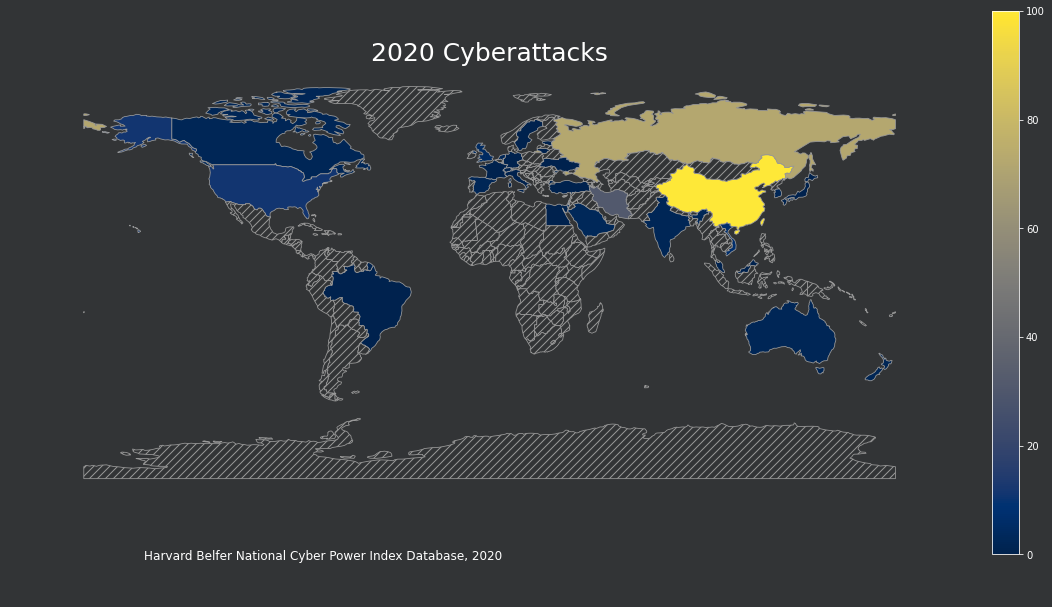

In [6]:
import matplotlib as mpl

#plotting attacks by country
variable = "attacks_total"
vmin, vmax = 0, 100 #scale of graph
fig, ax = plt.subplots(1, figsize=(20, 10))
merged.plot(column = variable, cmap = "cividis", linewidth = 0.8, ax = ax, edgecolor = "0.6", vmin = vmin, vmax = vmax, legend = False,
            missing_kwds = {"color": "#323436", "hatch": "///"}) #countries without data are hatched out

norm = mpl.colors.Normalize(vmin=0,vmax=100)
sm = plt.cm.ScalarMappable(cmap="cividis", norm=norm)
sm.set_array([])
cb = plt.colorbar(sm)
cb.ax.yaxis.set_tick_params(color= "white")
cb.outline.set_edgecolor("white")
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color= "white")

#formatting graph
ax.axis('off')
fig.patch.set_facecolor('#323436')
ax.set_title("2020 Cyberattacks", fontdict={"fontsize": "25", "fontweight" : "3"}, color = "#ffffff")
ax.annotate("Harvard Belfer National Cyber Power Index Database, 2020",xy = (0.1, .08),  xycoords = "figure fraction", horizontalalignment = "left", verticalalignment = "top", fontsize = 12, color = "#ffffff")

Text(0.1, 0.08, 'Harvard Belfer National Cyber Power Index Database, 2020')

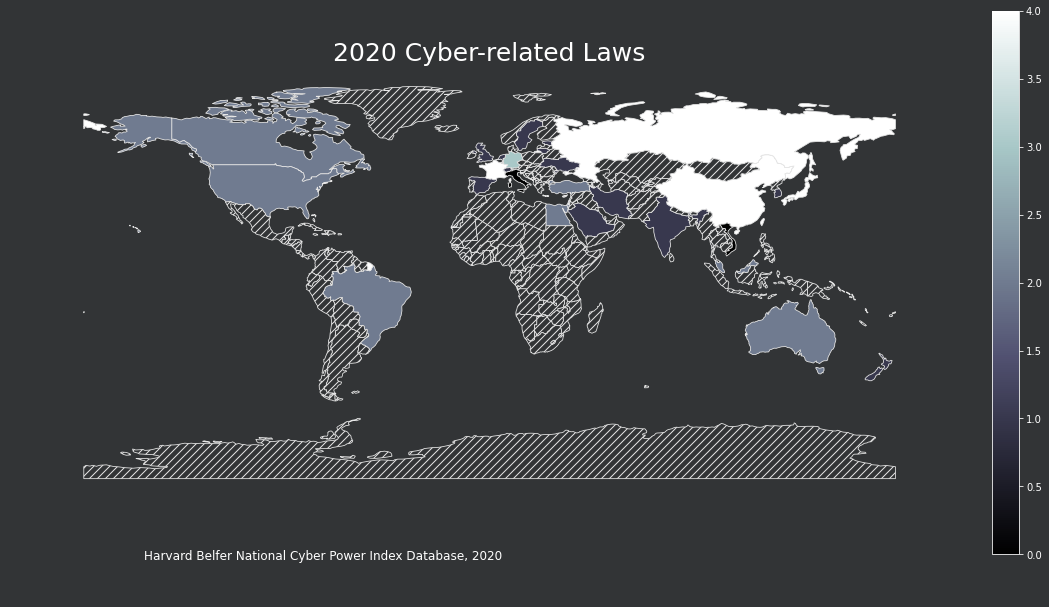

In [7]:
import matplotlib as mpl

#merge the dataframes into one
merged = world.set_index("name").join(df1.set_index("country"))
merged.head()

#plotting attacks by country
variable = "laws"
vmin, vmax = 0, 4 #scale of graph
fig, ax = plt.subplots(1, figsize=(20, 10))

merged.plot(column = variable, cmap = "bone", linewidth = 0.8, ax = ax, edgecolor = "0.9", vmin = vmin, vmax = vmax, legend = False,
            missing_kwds = {"color": "#323436", "hatch": "///"}) #countries without data are hatched out

norm = mpl.colors.Normalize(vmin= vmin,vmax= vmax)
sm = plt.cm.ScalarMappable(cmap="bone", norm=norm)
sm.set_array([])
cb = plt.colorbar(sm)
cb.ax.yaxis.set_tick_params(color= "white")
cb.outline.set_edgecolor("white")
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color= "white")

#formatting graph
ax.axis('off')
fig.patch.set_facecolor('#323436')
ax.set_title("2020 Cyber-related Laws", fontdict={"fontsize": "25", "fontweight" : "3"}, color = "#ffffff")
ax.annotate("Harvard Belfer National Cyber Power Index Database, 2020",xy = (0.1, .08),  xycoords = "figure fraction", horizontalalignment = "left", verticalalignment = "top", fontsize = 12, color = "#ffffff")

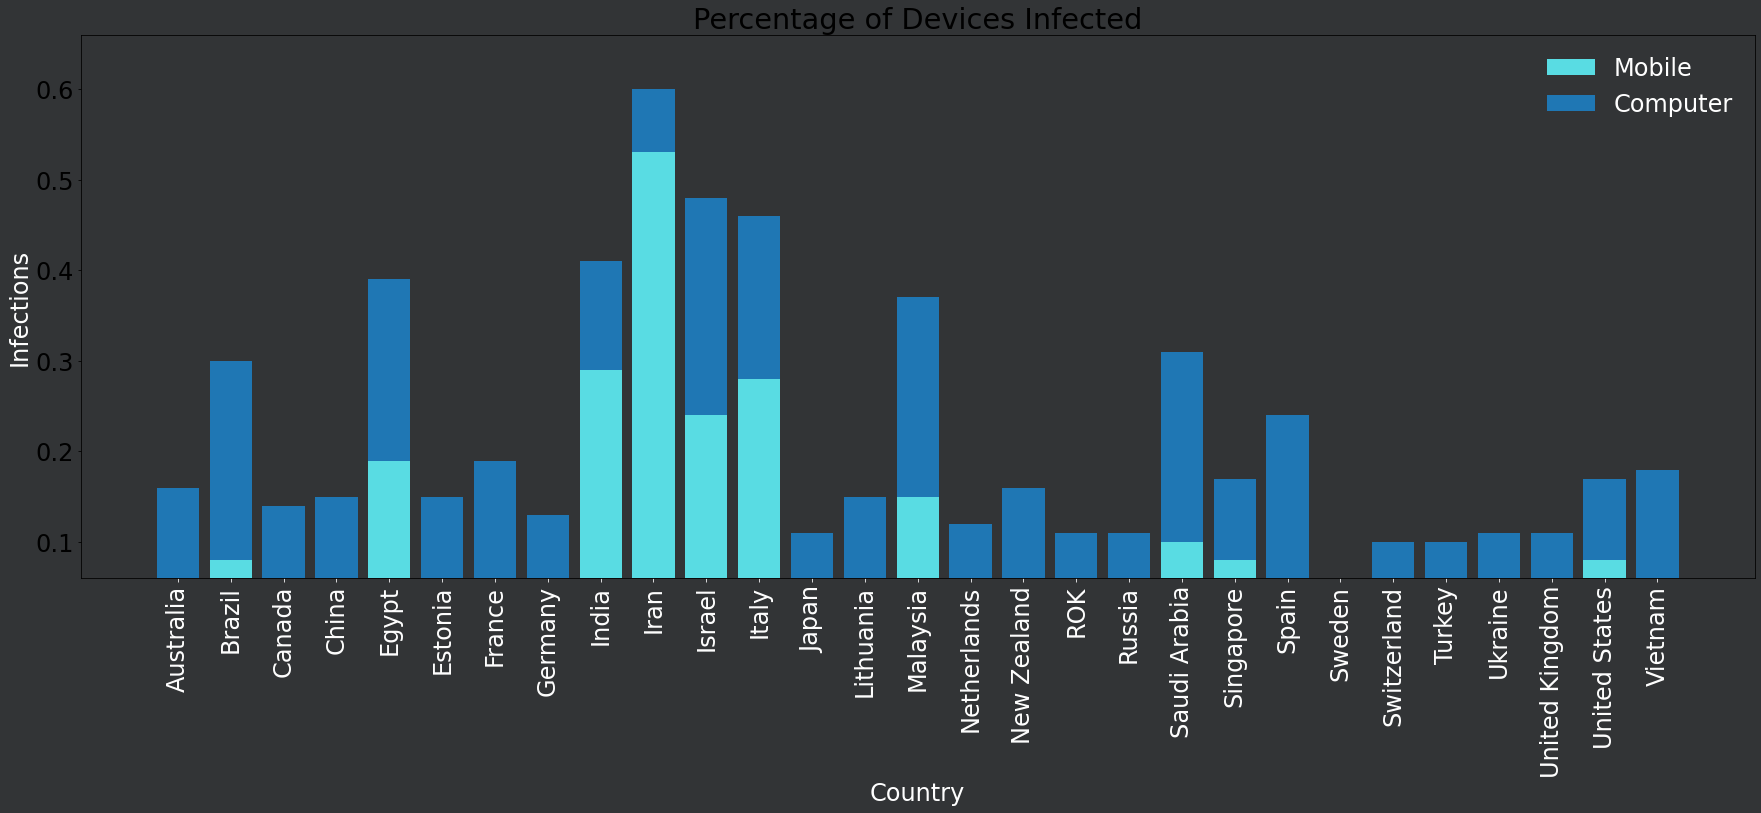

In [8]:
font = {'size'   : 24}

plt.rc('font', **font)

plt.rcParams["figure.figsize"] = [30, 10]
fig, ax = plt.subplots()

low = min(df1["mobile_infection"] + df1["computer_infection"])
high = max(df1["mobile_infection"] + df1["computer_infection"])
plt.ylim([low, high+.1*high])
plt.xticks(rotation=90)
plt.title("Percentage of Devices Infected")
ax.bar(df1["country"], df1["mobile_infection"], label='Mobile', color = "#59dce3")
ax.bar(df1["country"], df1["computer_infection"], bottom= df1["mobile_infection"],
       label='Computer')
plt.xlabel("Country")
plt.ylabel("Infections")
fig.patch.set_facecolor('#323436')
ax.set_facecolor("#323436")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
mpl.rcParams['text.color'] = 'white'
ax.tick_params(axis='x', colors='white')
ax.legend(facecolor = "#323436", edgecolor = "#323436")